# Final Project 
## 'Put Me in Coach: Using Data to Investigate Player Interaction'
### Isabel Osgood

In [1]:
import pandas as pd 
import numpy as np
import re
from os import listdir
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option("display.max_columns", 60)


In [2]:
# pbp_18 = pd.read_csv("2018-2019_NBA_PbP_Logs/[10-16-2018]-[06-13-2019]-combined-stats.csv", encoding='latin1')

# pbp_19 = pd.read_csv("2019-2020_NBA_PbP_Logs/[10-22-2019]-[10-11-2020]-combined-stats.csv")

In [3]:

# df = pd.concat([pbp_18, pbp_18])
# df = df[df['team']=='DEN']
# df[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2',
#        'h3', 'h4', 'h5']].value_counts()

# playerlista = df['a1'].values.tolist() + df['a2'].values.tolist() +df['a3'].values.tolist() +df['a4'].values.tolist()  + df['a5'].values.tolist()
# playerlisth = df['h1'].values.tolist() + df['h2'].values.tolist() +df['h3'].values.tolist() +df['h4'].values.tolist()  + df['h5'].values.tolist()
# playerz = pd.Series(playerlista +playerlisth)
# playerz.value_counts()


In [4]:
#Slightly complicated readin
teamdf = None
home_away = []
season18 = listdir("2018-2019_NBA_PbP_Logs")   #check season 2018-2019
for file in season18:
    if re.search('DEN', file):                  #if Denver played
        if teamdf is not None:
            d = '2018-2019_NBA_PbP_Logs/'        
            df2 = pd.read_csv(d+file)
            if re.search('DEN.csv', file):      #check if second team and assign home/away team 
                df2['home_away'] = ['home' for i in range(len(df2))]
            else:
                df2['home_away'] = ['away' for i in range(len(df2))]
            teamdf = pd.concat([teamdf, df2], ignore_index=True)
        else:
            d = '2018-2019_NBA_PbP_Logs/'
            teamdf = pd.read_csv(d+file)
            if re.search('DEN.csv', file):
                teamdf['home_away'] = ['home' for i in range(len(teamdf))]
            else:
                teamdf['home_away'] = ['away' for i in range(len(teamdf))]
            


season19 = listdir("2019-2020_NBA_PbP_Logs")          #repeat above 
for file in season19:
    if re.search('DEN', file):
        if teamdf is not None:
            d = '2019-2020_NBA_PbP_Logs/'
            df2 = pd.read_csv(d+file)
            if re.search('DEN.csv', file):
                df2['home_away'] = ['home' for i in range(len(df2))]
            else:
                df2['home_away'] = ['away' for i in range(len(df2))]
            teamdf = pd.concat([teamdf, df2], ignore_index=True)
        else:
            print("something has gone terribly wrong") #if we get here and df is empty 

teamdf


,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,remaining_time,elapsed,play_length,play_id,team,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,home_away
0,"=""0021800012""",2018-2019 Regular Season,2018-10-17,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Tobias Harris,Danilo Gallinari,Marcin Gortat,Avery Bradley,Patrick Beverley,1,0,0,00:12:00,00:00:00,00:00:00,2,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,away
1,"=""0021800012""",2018-2019 Regular Season,2018-10-17,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Tobias Harris,Danilo Gallinari,Marcin Gortat,Avery Bradley,Patrick Beverley,1,0,0,00:12:00,00:00:00,00:00:00,4,LAC,jump ball,NaN,Nikola Jokic,Marcin Gortat,NaN,NaN,NaN,NaN,NaN,NaN,Marcin Gortat,NaN,Tobias Harris,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Gortat vs. Jokic: Tip to Harris,away
2,"=""0021800012""",2018-2019 Regular Season,2018-10-17,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Tobias Harris,Danilo Gallinari,Marcin Gortat,Avery Bradley,Patrick Beverley,1,0,0,00:11:46,00:00:14,00:00:14,7,LAC,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Danilo Gallinari,0.0,NaN,NaN,missed,NaN,Jump Shot,13.0,-51,115,19.9,77.5,MISS Gallinari 13' Jump Shot,away
3,"=""0021800012""",2018-2019 Regular Season,2018-10-17,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Tobias Harris,Danilo Gallinari,Marcin Gortat,Avery Bradley,Patrick Beverley,1,0,0,00:11:41,00:00:19,00:00:05,8,DEN,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jamal Murray,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Murray REBOUND (Off:0 Def:1),away
4,"=""0021800012""",2018-2019 Regular Season,2018-10-17,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Tobias Harris,Danilo Gallinari,Marcin Gortat,Avery Bradley,Patrick Beverley,1,0,0,00:11:23,00:00:37,00:00:18,9,DEN,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jamal Murray,0.0,NaN,NaN,missed,NaN,Jump Shot,26.0,146,221,10.4,27.1,MISS Murray 26' 3PT Jump Shot,away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87342,'0041900166,2019-20 Playoffs,2020-08-30,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,Mike Conley,Donovan Mitchell,Royce O'Neale,Rudy Gobert,Jordan Clarkson,4,118,107,0:00:25,0:11:35,0:00:00,615,DEN,free throw,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,Nikola Jokic,1.0,NaN,NaN,made,NaN,Free Throw 1 of 2,NaN,NaN,NaN,NaN,NaN,Jokic Free Throw 1 of 2 (21 PTS),away
87343,'0041900166,2019-20 Playoffs,2020-08-30,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,Mike Conley,Donovan Mitchell,Royce O'Neale,Rudy Gobert,Jordan Clarkson,4,119,107,0:00:25,0:11:35,0:00:00,616,DEN,free throw,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,Nikola Jokic,1.0,NaN,NaN,made,NaN,Free Throw 2 of 2,NaN,NaN,NaN,NaN,NaN,Jokic Free Throw 2 of 2 (22 PTS),away
87344,'0041900166,2019-20 Playoffs,2020-08-30,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,Mike Conley,Donovan Mitchell,Royce O'Neale,Rudy Gobert,Jordan Clarkson,4,119,107,0:00:15,0:11:45,0:00:10,617,UTA,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Royce O'Neale,0.0,NaN,NaN,missed,NaN,3PT Jump Shot,27.0,-109,247,14.1,64.3,MISS O'Neale 27' 3PT Jump Shot,away
87345,'0041900166,2019-20 Playoffs,2020-08-30,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,Mike Conley,Donovan Mitchell,Royce O'Neale,Rudy Gobert,Jordan Clarkson,4,119,107,0:00:11,0:11:49,0:00:04,618,DEN,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Torrey Craig,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Craig REBOUND (Off:0 Def:6),away


In [5]:
#get only offensive plays
#also get rid of free throws

#print(teamdf['team'].value_counts())
#teamdf.columns
offDF = teamdf[teamdf['team']=='DEN']
offDF = offDF[offDF['event_type']!='free throw']
len(offDF)

36805

In [44]:
#get just the variables for analysis
homedf = offDF[offDF['home_away']=='home'] 
awaydf = offDF[offDF['home_away']=='away']

homedf = homedf[['h1', 'h2', 'h3', 'h4', 'h5', 'remaining_time', 'play_length', 'data_set','points', 'period']]
awaydf = awaydf[['a1', 'a2', 'a3', 'a4', 'a5', 'remaining_time', 'play_length', 'data_set','points', 'period']]

#rename cols for concat
homedf.columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'remaining_time', 'play_length', 'data_set','points', 'period']
awaydf.columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'remaining_time', 'play_length', 'data_set','points', 'period']
# print(type(homedf))
# print(type(awaydf))
df = pd.concat([homedf, awaydf], ignore_index=True)

#replace nan points with 0s - nans are plays where no shot was taken 
df['points'] = df['points'].fillna(0)
df = df.dropna()

#get dummies for season
df = pd.get_dummies(df, columns=['data_set'])

df


,p1,p2,p3,p4,p5,remaining_time,play_length,points,period,data_set_2018-2019 Regular Season,data_set_2019 Playoff,data_set_2019-20 Playoffs,data_set_2019-20 Regular Season,data_set_2019-2020 Regular Season
0,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:12:00,0:00:00,0.0,1,1,0,0,0,0
1,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:39,0:00:21,0.0,1,1,0,0,0,0
2,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:37,0:00:02,0.0,1,1,0,0,0,0
3,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:37,0:00:00,0.0,1,1,0,0,0,0
4,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:36,0:00:01,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36800,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:01:13,0:00:20,0.0,4,0,0,1,0,0
36801,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:01:13,0:00:00,0.0,4,0,0,1,0,0
36802,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:00:52,0:00:21,3.0,4,0,0,1,0,0
36803,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:00:43,0:00:04,0.0,4,0,0,1,0,0


## Players

Nikola Jokic              24151
Jamal Murray              22171
Monte Morris              17535
Gary Harris               17175
Paul Millsap              15763
Will Barton               13656
Mason Plumlee             13379
Torrey Craig              13343
Malik Beasley             11993
Jerami Grant              10373
Juancho Hernangomez        7413
Michael Porter Jr.         5771
Trey Lyles                 4543
PJ Dozier                  2307
Isaiah Thomas               789
Keita Bates-Diop            505
Jarred Vanderbilt           501
Troy Daniels                481
Bol Bol                     446
Tyler Lydon                 380
Brandon Goodwin             229
Vlatko Cancar               205
Thomas Welsh                171
Noah Vonleh                 154
Nick Young                  148
Jordan McRae                137
DeVaughn Akoon-Purcell       93
Tyler Cook                   83
dtype: int64


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


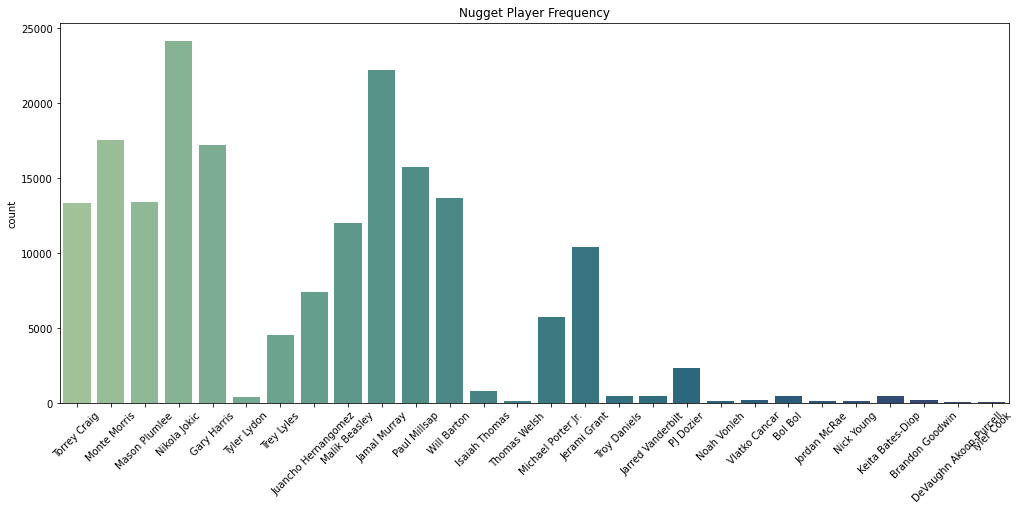

In [7]:
#get a list of players who played in two seasons 
playerlist = pd.Series(df['p1'].values.tolist() + df['p2'].values.tolist() +df['p3'].values.tolist() +df['p4'].values.tolist()  + df['p5'].values.tolist())
print(playerlist.value_counts())


fig, ax = plt.subplots(figsize=(17, 7))
ax.set_xticklabels(rotation=45, labels=playerlist) 
plt.title("Nugget Player Frequency")
ax = sns.countplot(x=playerlist, palette='crest')


Nikola Jokic           24151
Jamal Murray           22171
Monte Morris           17535
Gary Harris            17175
Paul Millsap           15763
Will Barton            13656
Mason Plumlee          13379
Torrey Craig           13343
Malik Beasley          11993
Jerami Grant           10373
Juancho Hernangomez     7413
Michael Porter Jr.      5771
Trey Lyles              4543
PJ Dozier               2307
dtype: int64


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


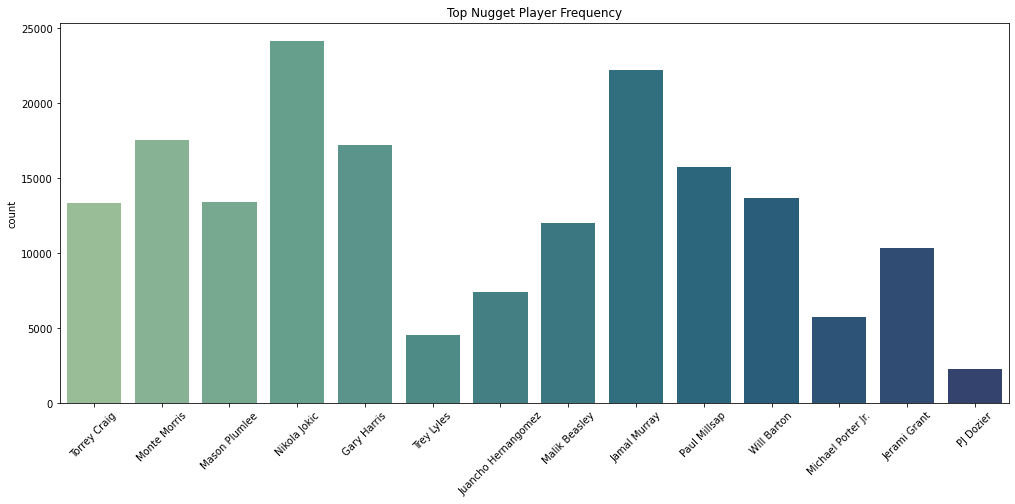

In [8]:
print(playerlist.value_counts()[:int(len(playerlist.value_counts())/2)]) #get the top half of players
top_players = playerlist.value_counts()[:int(len(playerlist.value_counts())/2)].to_dict().keys()

tops = []
for x in playerlist:
    if x in top_players:
        tops.append(x)
        
fig, ax = plt.subplots(figsize=(17, 7))
ax.set_xticklabels(rotation=45, labels=list(top_players))
plt.title("Top Nugget Player Frequency")
ax = sns.countplot(x=tops, palette='crest')


In [9]:

#put all players on court into a list instead of seperate columns 
df['onCourt'] = df[['p1', 'p2', 'p3', 'p4', 'p5']].values.tolist()
df.isna().sum()

#one hot encode
mlb = MultiLabelBinarizer()

df2 = pd.DataFrame(mlb.fit_transform(df['onCourt']), columns=mlb.classes_)
for c in df2.columns:
    if c not in top_players:
        df2 = df2.drop([c], axis=1)
        
df

,p1,p2,p3,p4,p5,remaining_time,play_length,points,data_set_2018-2019 Regular Season,data_set_2019 Playoff,data_set_2019-20 Playoffs,data_set_2019-20 Regular Season,data_set_2019-2020 Regular Season,onCourt
0,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:12:00,0:00:00,0.0,1,0,0,0,0,"[Torrey Craig, Paul Millsap, Nikola Jokic, Gar..."
1,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:39,0:00:21,0.0,1,0,0,0,0,"[Torrey Craig, Paul Millsap, Nikola Jokic, Gar..."
2,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:37,0:00:02,0.0,1,0,0,0,0,"[Torrey Craig, Paul Millsap, Nikola Jokic, Gar..."
3,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:37,0:00:00,0.0,1,0,0,0,0,"[Torrey Craig, Paul Millsap, Nikola Jokic, Gar..."
4,Torrey Craig,Paul Millsap,Nikola Jokic,Gary Harris,Will Barton,0:11:36,0:00:01,0.0,1,0,0,0,0,"[Torrey Craig, Paul Millsap, Nikola Jokic, Gar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36800,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:01:13,0:00:20,0.0,0,0,1,0,0,"[Torrey Craig, Michael Porter Jr., Nikola Joki..."
36801,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:01:13,0:00:00,0.0,0,0,1,0,0,"[Torrey Craig, Michael Porter Jr., Nikola Joki..."
36802,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:00:52,0:00:21,3.0,0,0,1,0,0,"[Torrey Craig, Michael Porter Jr., Nikola Joki..."
36803,Torrey Craig,Michael Porter Jr.,Nikola Jokic,Jerami Grant,Jamal Murray,0:00:43,0:00:04,0.0,0,0,1,0,0,"[Torrey Craig, Michael Porter Jr., Nikola Joki..."


#### create final dataframe 

In [57]:
#combine to make the final df

df2['remaining_time'], df2['play_length'], df2['points'] = df['remaining_time'], df['play_length'], df['points']
modeldf = df2
df2['period'] = df['period']
# or 
#modeldf = pd.concat([df.iloc[:, 5:], df2], axis=1)


modeldf = modeldf.dropna() #drop na again bc concat made more?
modeldf['remaining_time'] = 60 * modeldf['remaining_time'].apply(lambda x: 60*int(x[-5:-3]) + int(x[-2:]))
modeldf['play_length'] = 60 * modeldf['play_length'].apply(lambda x: 60*int(x[-5:-3]) + int(x[-2:]))


#TO DO: ADJUST TIME REMAINING 
# def mod_time_p1(x):
#     mult = 60*12*3
#     return x +mult

# def mod_time_p2(x):
#     mult = 60*12*2
#     return x +mult

# def mod_time_p3(x):
#     mult = 60*12
#     return x +mult
# modeldf['add_time'] = modeldf['period'].apply(lambda x: 2160 if x==1 else 0)
# modeldf['remaining_time'] = modeldf['remaining_time'] + modeldf['period']

modeldf

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Gary Harris,Jamal Murray,Jerami Grant,Juancho Hernangomez,Malik Beasley,Mason Plumlee,Michael Porter Jr.,Monte Morris,Nikola Jokic,PJ Dozier,Paul Millsap,Torrey Craig,Trey Lyles,Will Barton,remaining_time,play_length,points,period,add_time
0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,43201.0,0,0.0,1.0,2160
1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,41941.0,1260,0.0,1.0,2160
2,1,0,0,0,0,0,0,0,1,0,1,1,0,1,41821.0,120,0.0,1.0,2160
3,1,0,0,0,0,0,0,0,1,0,1,1,0,1,41821.0,0,0.0,1.0,2160
4,1,0,0,0,0,0,0,0,1,0,1,1,0,1,41761.0,60,0.0,1.0,2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36774,0,1,1,0,0,0,1,0,1,0,0,1,0,0,34384.0,180,0.0,4.0,0
36775,0,1,1,0,0,0,1,0,1,0,0,1,0,0,34204.0,180,0.0,4.0,0
36776,0,1,1,0,0,0,1,0,1,0,0,1,0,0,31564.0,360,3.0,4.0,0
36777,0,1,1,0,0,0,1,0,1,0,0,1,0,0,30724.0,0,0.0,4.0,0


## With All variables

In [11]:
#Split data
y = modeldf['points'].astype(int).astype("category")
X = modeldf.drop(['points'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#random forest 
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print("Train Accuracy for Random Forest:", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy for Random Forest:", accuracy_score(y_test, rf_test_pred))

Train Accuracy for Random Forest: 0.9937808528005597
Test Accuracy for Random Forest: 0.7324505713767459


In [13]:
#Multiclass logistic Regression 
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

lr_train_pred = logreg.predict(X_train)
lr_test_pred = logreg.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Test Accuracy:", accuracy_score(y_test, lr_test_pred))

Train Accuracy: 0.7814358456096707
Test Accuracy: 0.7789769635407219


In [14]:
#K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, knn_train_pred))
print("Test Accuracy:", accuracy_score(y_test, knn_test_pred))

Train Accuracy: 0.8070509581373654
Test Accuracy: 0.7612007981135498


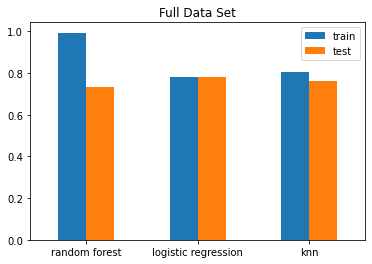

In [15]:
#graph accuracys 
acc_df = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)]}, 
                       index =  ['random forest', 'logistic regression',  'knn'])

acc_all = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)], 
                       "model": ['random forest', 'logistic regression',  'knn'], 
                       "Data": ['All Data']*3})

ax = acc_df.plot.bar(rot=0, title="Full Data Set")


 1) remaining_time                 0.530442
 2) play_length                    0.291454
 3) Torrey Craig                   0.017033
 4) Malik Beasley                  0.014878
 5) Gary Harris                    0.014758
 6) Jamal Murray                   0.014123
 7) Will Barton                    0.014113
 8) Mason Plumlee                  0.014068
 9) Monte Morris                   0.014002
10) Jerami Grant                   0.013158
11) Juancho Hernangomez            0.012536
12) Nikola Jokic                   0.012417
13) Paul Millsap                   0.012230
14) Michael Porter Jr.             0.010668
15) Trey Lyles                     0.008452
16) PJ Dozier                      0.005669


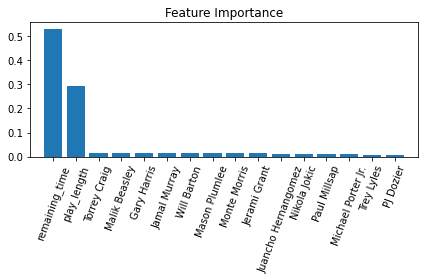

In [16]:
#do some feature selection
feat_labels = X_train.columns

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

## With only remaining time 

In [17]:
# re Split data
y = modeldf['points'].astype(int).astype("category")
X = modeldf['remaining_time'] #X is only remaining time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [18]:
#random forest 
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print("Train Accuracy for Random Forest:", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy for Random Forest:", accuracy_score(y_test, rf_test_pred))

Train Accuracy for Random Forest: 0.7895142949967512
Test Accuracy for Random Forest: 0.7849781515376371


In [19]:
#Multiclass logistic Regression 
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

lr_train_pred = logreg.predict(X_train)
lr_test_pred = logreg.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Test Accuracy:", accuracy_score(y_test, lr_test_pred))

Train Accuracy: 0.7895142949967512
Test Accuracy: 0.7849781515376371


In [20]:
#K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, knn_train_pred))
print("Test Accuracy:", accuracy_score(y_test, knn_test_pred))

Train Accuracy: 0.7705084470435347
Test Accuracy: 0.7600791491466733


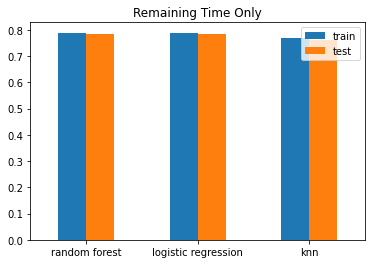

In [21]:
#graph accuracys 
acc_df = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)]}, 
                       index =  ['random forest', 'logistic regression',  'knn'])

acc_time = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)], 
                       "model": ['random forest', 'logistic regression',  'knn'], 
                       "Data": ['Time Only']*3})

ax = acc_df.plot.bar(rot=0, title="Remaining Time Only")

## only with players 

In [22]:
#Split data
y = modeldf['points'].astype(int).astype("category")
X = modeldf.drop(['points', 'play_length', 'remaining_time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = np.array(y_train)

In [23]:
#random forest 
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print("Train Accuracy for Random Forest:", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy for Random Forest:", accuracy_score(y_test, rf_test_pred))

Train Accuracy for Random Forest: 0.7908544509421702
Test Accuracy for Random Forest: 0.7818451644818204


In [24]:
#Multiclass logistic Regression 
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

lr_train_pred = logreg.predict(X_train)
lr_test_pred = logreg.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Test Accuracy:", accuracy_score(y_test, lr_test_pred))

Train Accuracy: 0.7895142949967512
Test Accuracy: 0.7849781515376371


In [25]:
#K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, knn_train_pred))
print("Test Accuracy:", accuracy_score(y_test, knn_test_pred))

Train Accuracy: 0.7841536712150747
Test Accuracy: 0.7775579190370188


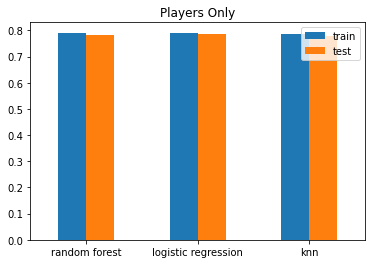

In [26]:
#graph accuracys 
acc_df = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)]}, 
                       index =  ['random forest', 'logistic regression',  'knn'])

acc_play = pd.DataFrame({"train": [accuracy_score(y_train, rf_train_pred), accuracy_score(y_train, lr_train_pred), accuracy_score(y_train, knn_train_pred)], 
                      "test": [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, lr_test_pred),  accuracy_score(y_test, knn_test_pred)], 
                       "model": ['random forest', 'logistic regression',  'knn'], 
                       "Data": ['Players Only']*3})

ax = acc_df.plot.bar(rot=0, title="Players Only")

 1) Mason Plumlee                  0.093384
 2) Nikola Jokic                   0.086490
 3) Torrey Craig                   0.085457
 4) Monte Morris                   0.079594
 5) Jamal Murray                   0.077793
 6) Malik Beasley                  0.076497
 7) Will Barton                    0.075527
 8) Jerami Grant                   0.074030
 9) Gary Harris                    0.072072
10) Juancho Hernangomez            0.070825
11) Paul Millsap                   0.062032
12) Michael Porter Jr.             0.059223
13) Trey Lyles                     0.046732
14) PJ Dozier                      0.040344


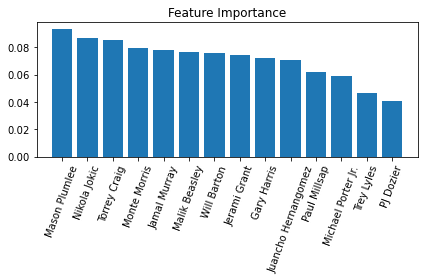

In [27]:
#do some feature selection
feat_labels = X_train.columns

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [28]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

features = []
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    # Keek track of feature indices
    features.append(feat_labels[indices[f]])

Number of features that meet this threshold criterion: 0


//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


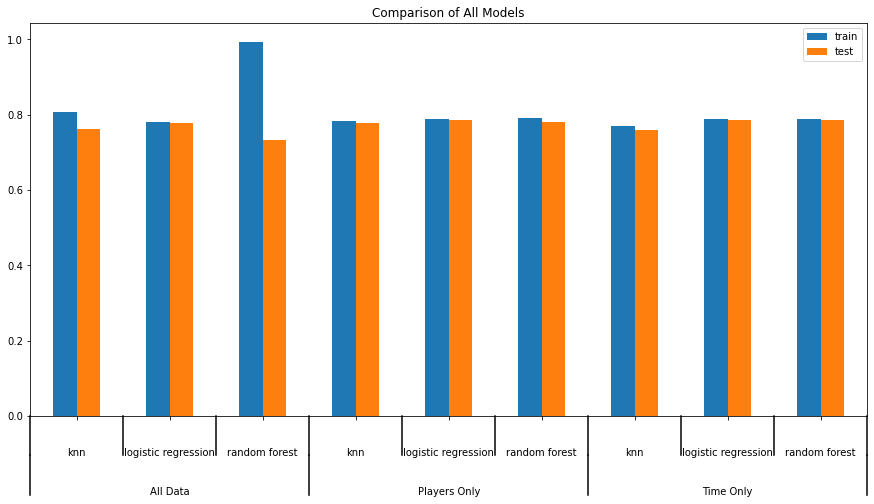

In [30]:
from itertools import groupby

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df_a = acc_all.append([acc_time, acc_play])

df_a = df_a.groupby(['Data', 'model']).sum()
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
df_a.plot(kind='bar',ax=fig.gca(), title="Comparison of All Models")
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df_a)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.show()

In [31]:
pd.set_option("display.max_rows", 100)
df['onCourt'] = df['onCourt'].apply(lambda x: str(sorted(x)))
df['play_length'] = 60 * df['play_length'].apply(lambda x: 60*int(x[-5:-3]) + int(x[-2:]))

In [38]:
aggs = df.groupby(['onCourt']).agg({'points': ['sum'], 'play_length': ['sum']})
aggs['play_count'] = df['onCourt'].value_counts()
aggs = aggs[aggs['play_length', 'sum']!= 0]
aggs['average'] = aggs['points', 'sum']/ aggs['play_count']

print(len(aggs))
aggs.sort_values(by=['average'], ascending=False).head(10)

690


,points,play_length,play_count,average
,sum,sum,,
onCourt,,,,
"['Jamal Murray', 'Paul Millsap', 'Torrey Craig', 'Trey Lyles', 'Will Barton']",6.0,2220,4,1.500000
"['Gary Harris', 'Isaiah Thomas', 'Malik Beasley', 'Nikola Jokic', 'Torrey Craig']",3.0,600,2,1.500000
"['Malik Beasley', 'Monte Morris', 'Paul Millsap', 'Torrey Craig', 'Will Barton']",3.0,120,2,1.500000
"['Jerami Grant', 'Juancho Hernangomez', 'Malik Beasley', 'Michael Porter Jr.', 'Will Barton']",3.0,600,2,1.500000
"['Bol Bol', 'Jerami Grant', 'Monte Morris', 'Nikola Jokic', 'Torrey Craig']",10.0,5100,9,1.111111
"['Jarred Vanderbilt', 'Malik Beasley', 'Monte Morris', 'PJ Dozier', 'Vlatko Cancar']",11.0,5940,10,1.100000
"['Bol Bol', 'Mason Plumlee', 'Michael Porter Jr.', 'PJ Dozier', 'Troy Daniels']",14.0,5760,13,1.076923
"['Jamal Murray', 'Michael Porter Jr.', 'Monte Morris', 'Nikola Jokic', 'Troy Daniels']",3.0,420,3,1.000000


In [43]:
aggs = aggs[aggs['average']==0.0]

aggs.sort_values(by=['play_count'], ascending=False).head(10)

,points,play_length,play_count,average
,sum,sum,,
onCourt,,,,
"['Juancho Hernangomez', 'Mason Plumlee', 'Monte Morris', 'Paul Millsap', 'Torrey Craig']",0.0,3360,18,0.0
"['Jerami Grant', 'Juancho Hernangomez', 'Monte Morris', 'Nikola Jokic', 'Will Barton']",0.0,3720,15,0.0
"['Gary Harris', 'Jamal Murray', 'Malik Beasley', 'Mason Plumlee', 'Torrey Craig']",0.0,5040,14,0.0
"['Gary Harris', 'Jamal Murray', 'Juancho Hernangomez', 'Paul Millsap', 'Will Barton']",0.0,4380,12,0.0
"['Monte Morris', 'Noah Vonleh', 'PJ Dozier', 'Paul Millsap', 'Torrey Craig']",0.0,3000,11,0.0
"['Gary Harris', 'Jerami Grant', 'Malik Beasley', 'Torrey Craig', 'Will Barton']",0.0,3060,11,0.0
"['Jamal Murray', 'Juancho Hernangomez', 'Paul Millsap', 'Torrey Craig', 'Trey Lyles']",0.0,3840,11,0.0
"['Gary Harris', 'Jamal Murray', 'Jerami Grant', 'Paul Millsap', 'Torrey Craig']",0.0,1680,11,0.0
